In [42]:
#from google.colab import drive
#drive.mount('/content/drive')

# Introduction

In this project, by using data mining and machine learning methods, we tried to design a system to predict diabetes.
In the aforementioned dataset, we have used the indicators Gender, Age, Race, Education, Marital Status,Occupation, Weight ,Height ,BMI ,Systolic blood pressure, Diastolic blood pressure, Direct cholesterol, Total cholesterol and Physical activity to learn our model.


Dataset from : https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey

# Starting (Getting data &  Normalization‌)

First, we call the libraries we need.
We use pandas, numpy, sklearn, matplotlib and seborn libraries.

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import copy


Some warnings cause clutter in our environment that we ignore them.

In [44]:
import warnings
warnings.filterwarnings('ignore')

Then we read our data with pandas structure.

In [45]:
dataset1 = pd.read_csv('NHANES.csv')
#dataset1 = pd.read_csv('/content/drive/MyDrive/2023/NHANES.csv')


One of the ways to reduce the data dimensions and clean the data is to remove the columns that we do not need:

**Data cleaning and dimensionality reduction**

In [46]:

#Here, because we have little processing power, we had to delete some data.
dataset2=dataset1.drop(dataset1.index[10000:10001])

#Here, we are going to delete the columns that we don't need.
dataset3=dataset2[["Gender",'Age','Race1','Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive','Diabetes']]

#Now we set the main dataset equal to the values we want.
dataset=copy.deepcopy(dataset3)

dataset.head()

,Gender,Age,Race1,Education,MaritalStatus,Work,Weight,Height,BMI,BPSysAve,BPDiaAve,DirectChol,TotChol,PhysActive,Diabetes
0,male,34,White,High School,Married,NotWorking,87.4,164.7,32.22,113.0,85.0,1.29,3.49,No,No
1,male,34,White,High School,Married,NotWorking,87.4,164.7,32.22,113.0,85.0,1.29,3.49,No,No
2,male,34,White,High School,Married,NotWorking,87.4,164.7,32.22,113.0,85.0,1.29,3.49,No,No
3,male,4,Other,NaN,NaN,NaN,17.0,105.4,15.30,NaN,NaN,NaN,NaN,NaN,No
4,female,49,White,Some College,LivePartner,NotWorking,86.7,168.4,30.57,112.0,75.0,1.16,6.70,No,No


In [47]:
# Data Dimensions
dataset.shape

(10000, 15)

**Check the data structure**

In [48]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Race1          10000 non-null  object 
 3   Education      7221 non-null   object 
 4   MaritalStatus  7231 non-null   object 
 5   Work           7771 non-null   object 
 6   Weight         9922 non-null   float64
 7   Height         9647 non-null   float64
 8   BMI            9634 non-null   float64
 9   BPSysAve       8551 non-null   float64
 10  BPDiaAve       8551 non-null   float64
 11  DirectChol     8474 non-null   float64
 12  TotChol        8474 non-null   float64
 13  PhysActive     8326 non-null   object 
 14  Diabetes       9858 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 1.1+ MB


Here we see that some of our records have undefined values. We have different ways to standardize here. As a solution, we can completely remove those rows so that the data we want to use for various purposes is standardized Or we can replace them with mean or median.

We give a brief overview of the structure of our data set:

In [49]:
dataset.isnull().sum()

Gender              0
Age                 0
Race1               0
Education        2779
MaritalStatus    2769
Work             2229
Weight             78
Height            353
BMI               366
BPSysAve         1449
BPDiaAve         1449
DirectChol       1526
TotChol          1526
PhysActive       1674
Diabetes          142
dtype: int64

In [50]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,36.742100,22.397566,0.00,17.00,36.00,54.00,80.00
Weight,9922.0,70.981798,29.125357,2.80,56.10,72.70,88.90,230.70
Height,9647.0,161.877838,20.186567,83.60,156.80,166.00,174.50,200.40
BMI,9634.0,26.660136,7.376579,12.88,21.58,25.98,30.89,81.25
BPSysAve,8551.0,118.154953,17.248170,76.00,106.00,116.00,127.00,226.00
BPDiaAve,8551.0,67.480061,14.354804,0.00,61.00,69.00,76.00,116.00
DirectChol,8474.0,1.364865,0.399258,0.39,1.09,1.29,1.58,4.03
TotChol,8474.0,4.879220,1.075583,1.53,4.11,4.78,5.53,13.65


According to what I had read, in this model of projects, deleting data is one of the worst things. Then I use the average value.

Of course, we should know that NaN values in the Diabetes column are not useful for us. Because this is our dependent variable. So we delete the rows in which diabetes has no value.

**Replace undefined values**

In [51]:
dataset_new=dataset
dataset_new = dataset_new.dropna(subset=['Diabetes'])



We also consider that our data has zero values in some columns, which we consider as undefined.

In [52]:
dataset_new[['Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive']] = dataset_new[['Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive']].replace(0, np.NaN) 

#Now we count undefined values again
dataset_new.isnull().sum()

Gender              0
Age                 0
Race1               0
Education        2639
MaritalStatus    2629
Work             2089
Weight             78
Height            216
BMI               229
BPSysAve         1312
BPDiaAve         1382
DirectChol       1389
TotChol          1389
PhysActive       1537
Diabetes            0
dtype: int64

Now we replace other columns with undefined values with the average values of those columns.

In [53]:
dataset_new["Weight"].fillna(dataset_new["Weight"].mean(), inplace = True)
dataset_new["Height"].fillna(dataset_new["Height"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)
dataset_new["BPSysAve"].fillna(dataset_new["BPSysAve"].mean(), inplace = True)
dataset_new["BPDiaAve"].fillna(dataset_new["BPDiaAve"].mean(), inplace = True)
dataset_new["DirectChol"].fillna(dataset_new["DirectChol"].mean(), inplace = True)
dataset_new["TotChol"].fillna(dataset_new["TotChol"].mean(), inplace = True)

dataset_new.isnull().sum()

Gender              0
Age                 0
Race1               0
Education        2639
MaritalStatus    2629
Work             2089
Weight              0
Height              0
BMI                 0
BPSysAve            0
BPDiaAve            0
DirectChol          0
TotChol             0
PhysActive       1537
Diabetes            0
dtype: int64

We also use their mode for discrete values.

In [54]:
dataset_new["PhysActive"].fillna(dataset_new["PhysActive"].mode()[0], inplace = True)
dataset_new["Education"].fillna(dataset_new["Education"].mode()[0], inplace = True)
dataset_new["MaritalStatus"].fillna(dataset_new["MaritalStatus"].mode()[0], inplace = True)
dataset_new["Work"].fillna(dataset_new["Work"].mode()[0], inplace = True)


dataset_new.isnull().sum()

Gender           0
Age              0
Race1            0
Education        0
MaritalStatus    0
Work             0
Weight           0
Height           0
BMI              0
BPSysAve         0
BPDiaAve         0
DirectChol       0
TotChol          0
PhysActive       0
Diabetes         0
dtype: int64

In [55]:
dataset=copy.deepcopy(dataset_new)

We have done the data cleaning step successfully.

# Data Visualization

In this section, we want to illustrate our data for a more detailed examination. We use Matplotlib and Seaborn libraries for this.
Here we ask some questions and find the answer with different diagrams.

What is the difference between the race of people who are diabetes positive and those who are diabetes negative?

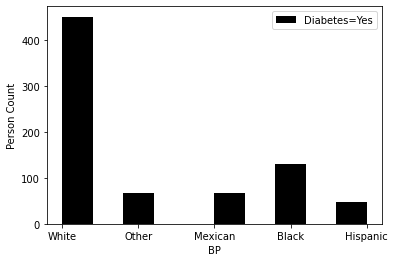

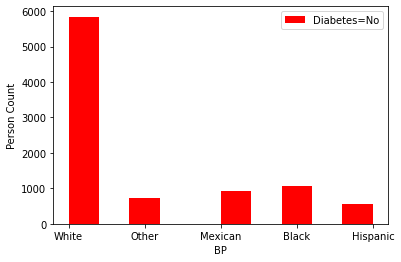

In [56]:
import matplotlib.pyplot as plt

YesDia = dataset_new['Diabetes'].values == 'Yes'
NoDia = dataset_new['Diabetes'].values == 'No'
YesDia=dataset_new[YesDia]
NoDia=dataset_new[NoDia]
 
Race1 = YesDia['Race1'].tolist()
Race0 = NoDia['Race1'].tolist()

plt.hist([Race1], color=[
         'Black'], label=['Diabetes=Yes'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

plt.hist([Race0], color=[
         'Red'], label=['Diabetes=No'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

Do most diabetics have little physical activity?

<AxesSubplot:xlabel='PhysActive', ylabel='count'>

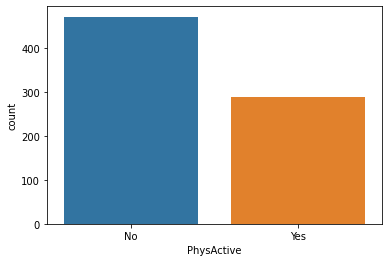

In [57]:
sns.countplot(x = 'PhysActive',data = YesDia)


<AxesSubplot:xlabel='PhysActive', ylabel='count'>

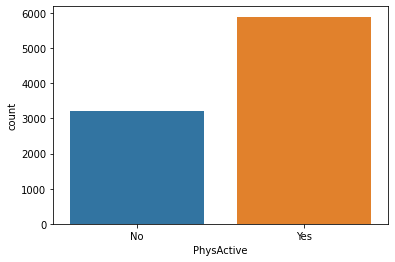

In [58]:
sns.countplot(x = 'PhysActive',data = NoDia)

**Lineplot**

<AxesSubplot:xlabel='Age', ylabel='Diabetes'>

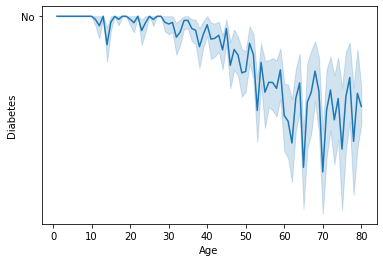

In [59]:
sns.lineplot(x="Age", y="Diabetes", data=dataset_new)

**Scatter matrix**

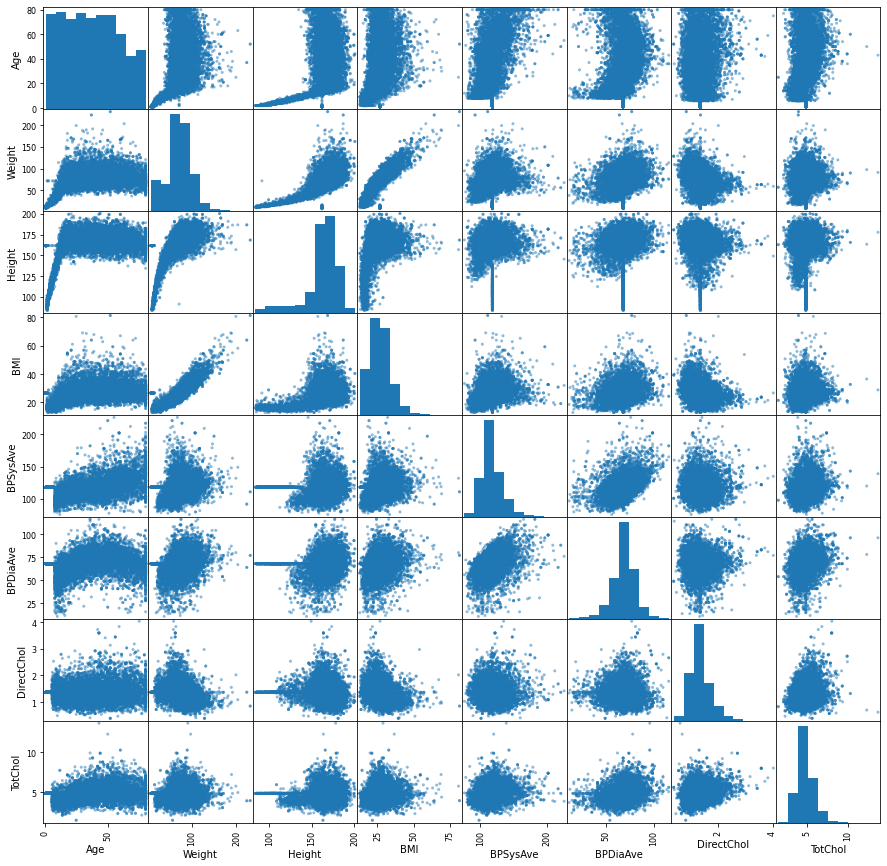

In [60]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(dataset , figsize=(15, 15))
plt.show()

**Distribution plots**

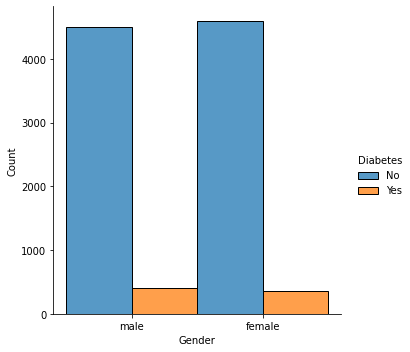

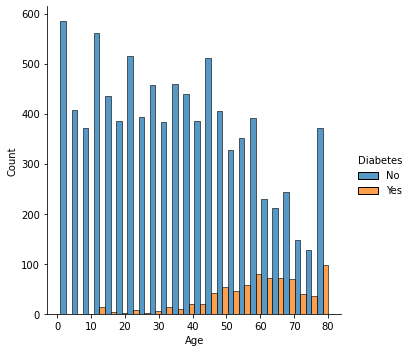

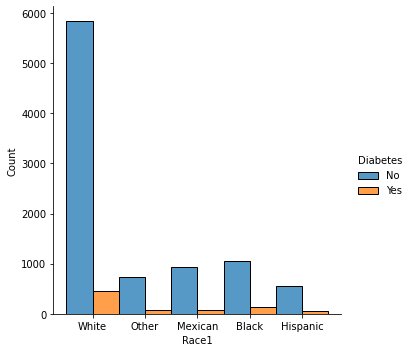

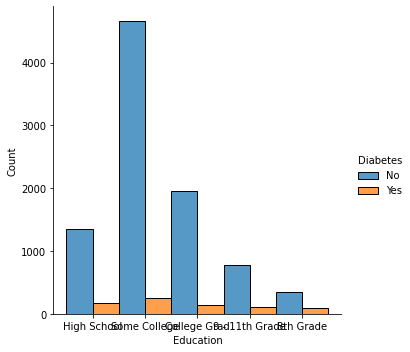

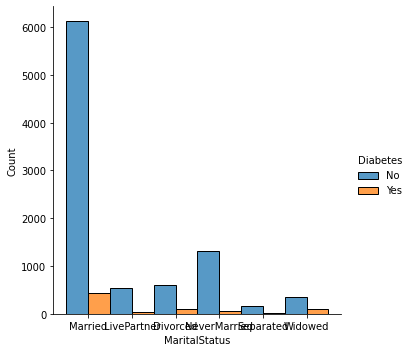

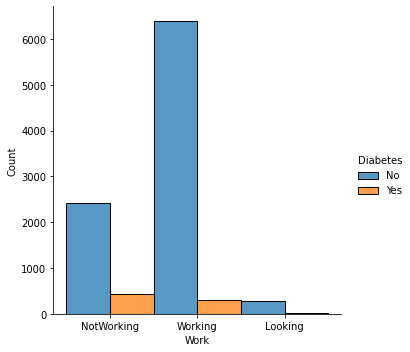

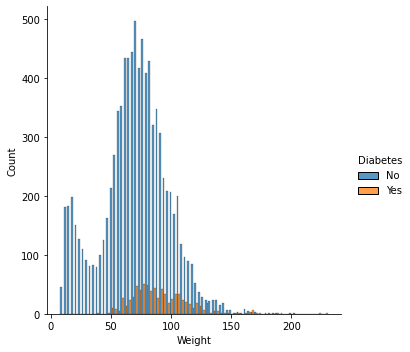

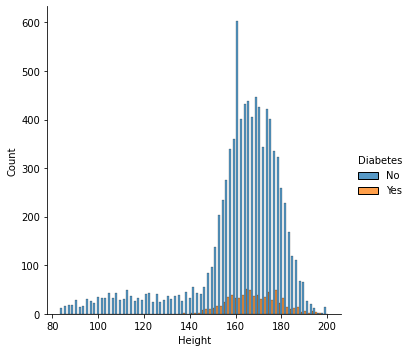

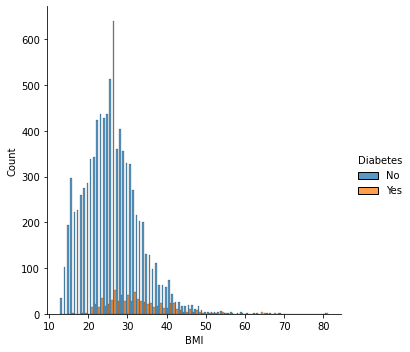

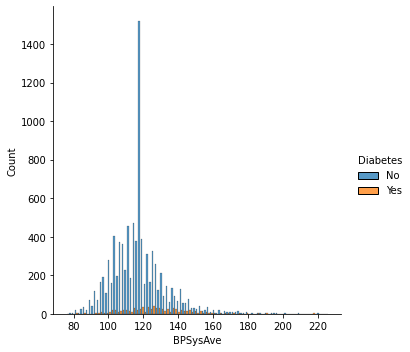

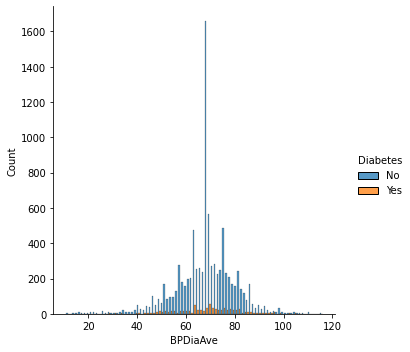

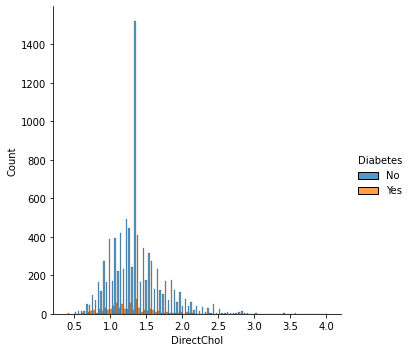

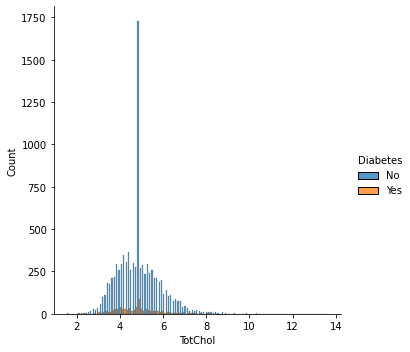

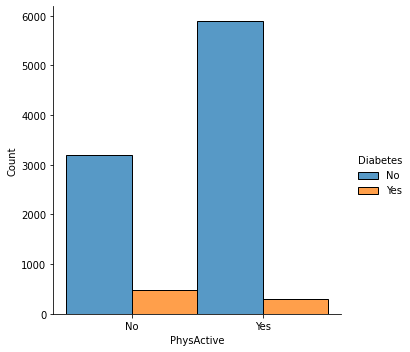

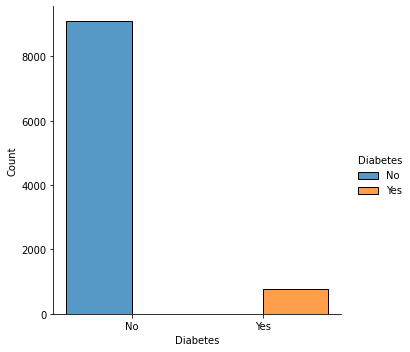

In [61]:
for i in dataset_new.columns:
    sns.displot(dataset, x=i,multiple="dodge",hue="Diabetes")
    

**Pair plot**

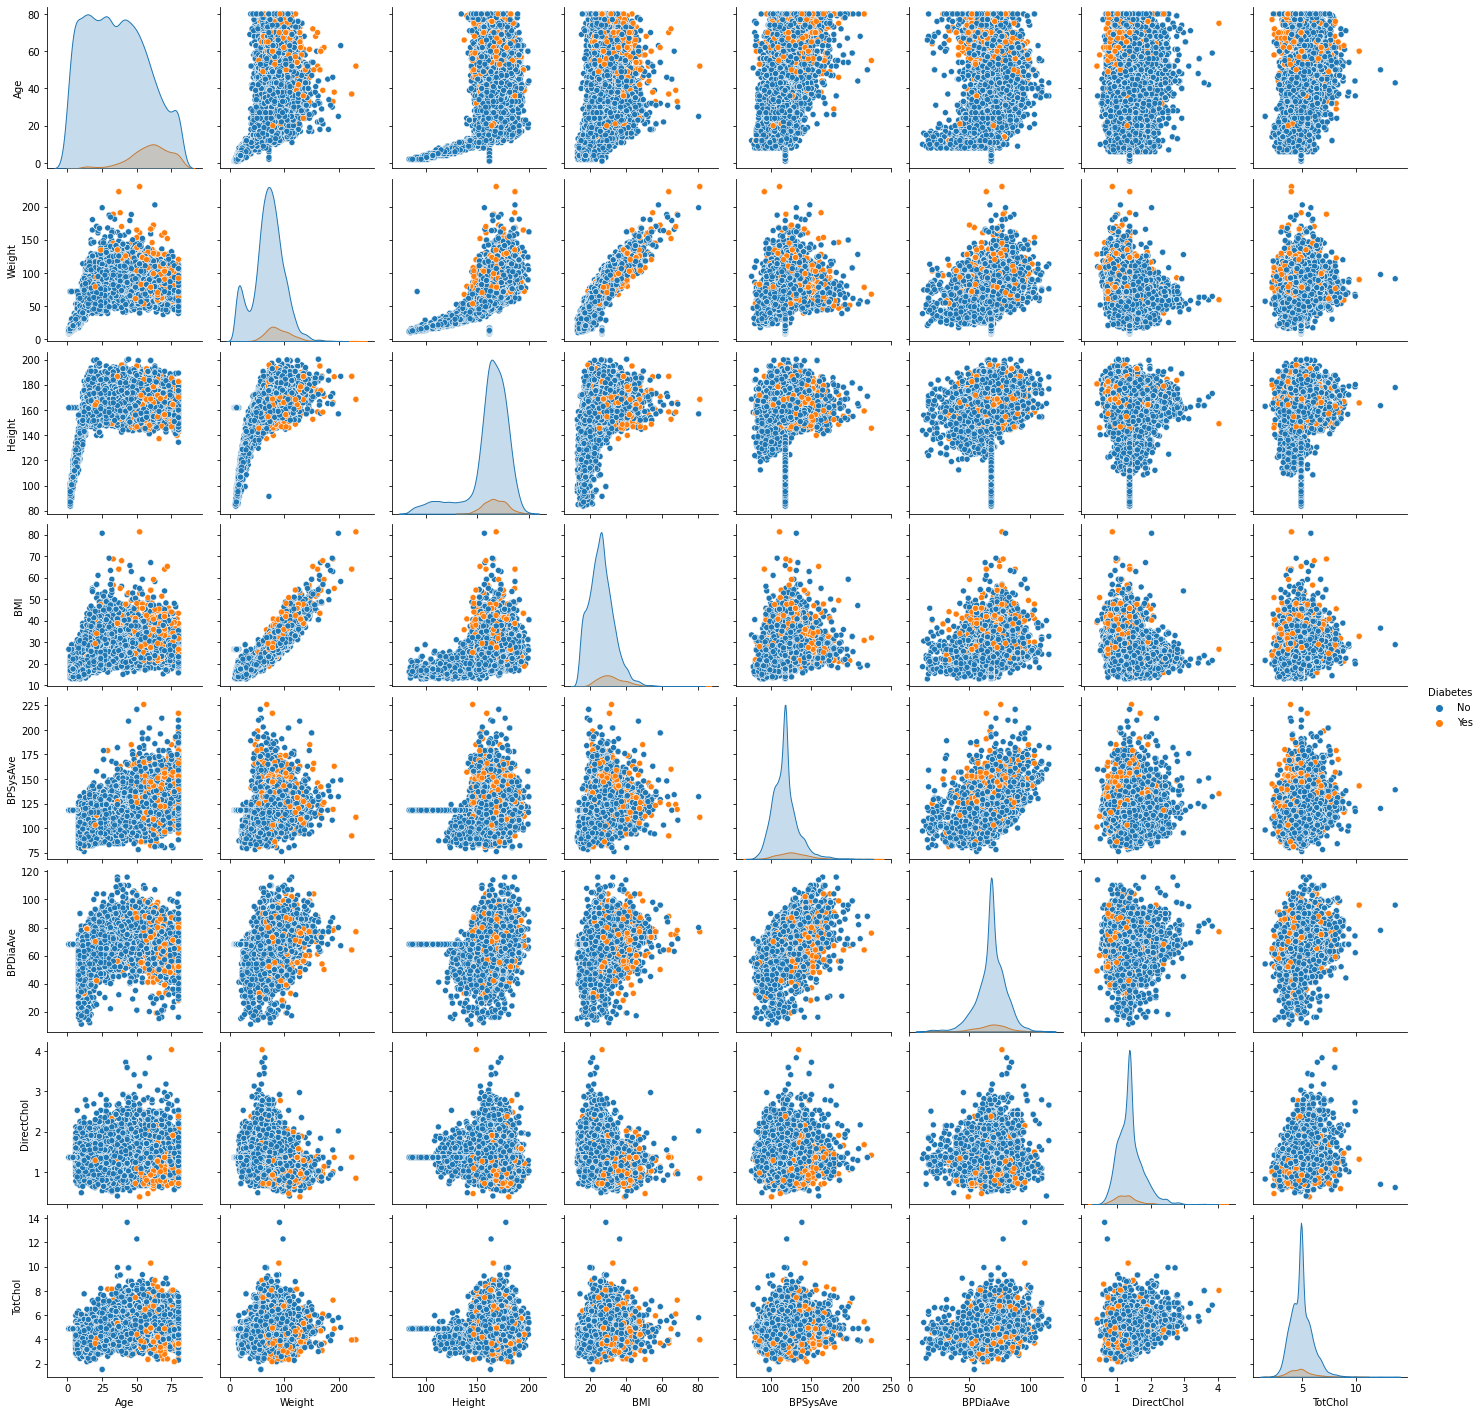

In [62]:
sns.pairplot(data = dataset, hue = 'Diabetes')
plt.show()

**Plot correlation matrix (Clustermap)**

In [63]:

import matplotlib.pyplot as plt
import numpy as np
 

#Converting dataset_new into a panda dataframe
df = dataset_new
corr = df.corr()

# Displaying dataframe of correlation values
corr.style.background_gradient(cmap ='coolwarm')

,Age,Weight,Height,BMI,BPSysAve,BPDiaAve,DirectChol,TotChol
Age,1.000000,0.485982,0.448773,0.396693,0.436330,0.192314,0.087136,0.279955
Weight,0.485982,1.000000,0.722345,0.870981,0.211238,0.239157,-0.256111,0.109253
Height,0.448773,0.722345,1.000000,0.434615,0.099839,0.156478,-0.091657,0.056475
BMI,0.396693,0.870981,0.434615,1.000000,0.231158,0.213611,-0.268621,0.130599
BPSysAve,0.436330,0.211238,0.099839,0.231158,1.000000,0.426362,0.004474,0.202014
BPDiaAve,0.192314,0.239157,0.156478,0.213611,0.426362,1.000000,-0.019679,0.250050
DirectChol,0.087136,-0.256111,-0.091657,-0.268621,0.004474,-0.019679,1.000000,0.221467
TotChol,0.279955,0.109253,0.056475,0.130599,0.202014,0.250050,0.221467,1.000000


# Algorithms

Here we process and standardize the data so that we can finally build different models with them.

**Dummy variable**

According to what we learned in the data mining course, in many models including logistic regression, we cannot have nominal discrete data. Dummy variables are a solution that can be effective to convert them into binary variables (by expanding the columns).



In [64]:

df3 = dataset_new.copy()
# These columns must be converted
df3 = pd.get_dummies(df3,columns = ['Gender', 'Race1','Education','MaritalStatus','Work','PhysActive','Diabetes'], drop_first = True)
print(df3.columns)
dataset_new=df3.copy()

Index(['Age', 'Weight', 'Height', 'BMI', 'BPSysAve', 'BPDiaAve', 'DirectChol',
       'TotChol', 'Gender_male', 'Race1_Hispanic', 'Race1_Mexican',
       'Race1_Other', 'Race1_White', 'Education_9 - 11th Grade',
       'Education_College Grad', 'Education_High School',
       'Education_Some College', 'MaritalStatus_LivePartner',
       'MaritalStatus_Married', 'MaritalStatus_NeverMarried',
       'MaritalStatus_Separated', 'MaritalStatus_Widowed', 'Work_NotWorking',
       'Work_Working', 'PhysActive_Yes', 'Diabetes_Yes'],
      dtype='object')


Now we see the result:

In [65]:
dataset_new.head()

,Age,Weight,Height,BMI,BPSysAve,BPDiaAve,DirectChol,TotChol,Gender_male,Race1_Hispanic,...,Education_Some College,MaritalStatus_LivePartner,MaritalStatus_Married,MaritalStatus_NeverMarried,MaritalStatus_Separated,MaritalStatus_Widowed,Work_NotWorking,Work_Working,PhysActive_Yes,Diabetes_Yes
0,34,87.4,164.7,32.22,113.000000,85.000000,1.290000,3.490000,1,0,...,0,0,1,0,0,0,1,0,0,0
1,34,87.4,164.7,32.22,113.000000,85.000000,1.290000,3.490000,1,0,...,0,0,1,0,0,0,1,0,0,0
2,34,87.4,164.7,32.22,113.000000,85.000000,1.290000,3.490000,1,0,...,0,0,1,0,0,0,1,0,0,0
3,4,17.0,105.4,15.30,118.159724,68.044597,1.365029,4.878875,1,0,...,1,0,1,0,0,0,0,1,1,0
4,49,86.7,168.4,30.57,112.000000,75.000000,1.160000,6.700000,0,0,...,1,1,0,0,0,0,1,0,0,0


**Preprocessing & Data Spliting**

This is one of the most important parts of our project. We must select the columns that we want to use as X and Y in the models. Then, according to the standards, 25% of the rows should randomly contain our test data, and the rest will be used for learning.

In [66]:
# Selecting X & Y
X = dataset_new.iloc[:, :-1].values
Y = dataset_new.iloc[:, -1].values



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.25, random_state = 0)






Most machine learning algorithms use Euclidean distance for their estimates. For this reason, if some samples have too much or too little value, the accuracy of the modeling will decrease. Data scaling is used to solve this problem.


In [67]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

This step was the last step of data preprocessing. Now we can inject our data into machine learning algorithms.

In [68]:
# Checking dimensions
print("XTrain shape:", XTrain.shape)
print("XTest shape:", XTest.shape)
print("YTrain shape:", YTrain.shape)
print("YTest shape:", YTest.shape)

XTrain shape: (7393, 25)
XTest shape: (2465, 25)
YTrain shape: (7393,)
YTest shape: (2465,)


**Cross validator**
.
.
.
.


In [69]:
#Importing required libraries
from sklearn.model_selection import KFold 
def Kfold_modulation(input_model):

    #Implementing cross validation
    k_list = [2,5,10]
    acc_list=[]
    for k in k_list:

        kf = KFold(n_splits=k, random_state=None)
        model = input_model
        
        acc_score = []
        
        for train_index , test_index in kf.split(X):
            X_train , X_test = X[train_index,:],X[test_index,:]
            y_train , y_test = Y[train_index] , Y[test_index]
            
            model.fit(X_train,y_train)
            pred_values = model.predict(X_test)
            
            acc = accuracy_score(pred_values , y_test)
            acc_score.append(acc)
            
        avg_acc_score = sum(acc_score)/k
        

      #  print('Avg acc : avg_acc_score)
        acc_list.append(avg_acc_score)
    return acc_list

We create logistic regression and random tree forest models:

**Logistic regresion**

In [70]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg_acc=Kfold_modulation(logreg)
logreg.fit(XTrain, YTrain)

LogisticRegression(random_state=0)

**Random forest**

In [71]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 10, random_state = 0)
ranfor_acc=Kfold_modulation(ranfor)
ranfor.fit(XTrain, YTrain)

RandomForestClassifier(n_estimators=10, random_state=0)

In [72]:
# Decision Trees Algorithm
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier( max_depth=3 , random_state = 0 )
DecTree_acc=Kfold_modulation(DecTree)
DecTree.fit(XTrain, YTrain)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [73]:
#  AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=10)
AdaBoost_acc=Kfold_modulation(AdaBoost)
AdaBoost.fit(XTrain, YTrain)

AdaBoostClassifier(n_estimators=10)

In [74]:
# Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb_acc=Kfold_modulation(nb)
nb.fit(XTrain, YTrain)

GaussianNB()

# Show Scoring

In this section, we must evaluate how reliable our models and measure the error rate of the Predictors (by K-Folds):

In [76]:
print("Logistic Regression: " + str(logreg_acc))
print("Random Forest: " + str(ranfor_acc))
print("DecisionTree: " + str(DecTree_acc))
print("AdaBoost: " + str(AdaBoost_acc))
print("Naive Bayes: " + str(nb_acc))

Logistic Regression: [0.923919659160073, 0.9252384216164815, 0.9251364792372401]
Random Forest: [0.920876445526476, 0.9238190578808545, 0.9220934710309819]
DecisionTree: [0.9201663623453034, 0.9214860404876799, 0.9206744164495836]
AdaBoost: [0.919659160073037, 0.9201675306137782, 0.9207756303991926]
Naive Bayes: [0.834854940150132, 0.8331312139614676, 0.832725260242378]


We draw the correlation matrix for better understanding:

[[2243   19]
 [ 179   24]]


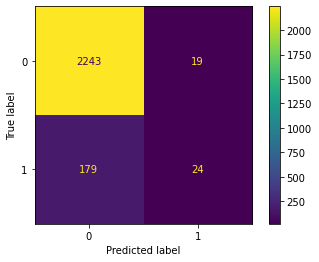

In [77]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#In the models, we put test data to make predictions for us.

YP_logreg = logreg.predict(XTest)

cm = confusion_matrix(YTest, YP_logreg, labels=None)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Classification report (for main classification metrics) :

In [78]:

from sklearn.metrics import classification_report
print(classification_report(YTest, YP_logreg))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2262
           1       0.56      0.12      0.20       203

    accuracy                           0.92      2465
   macro avg       0.74      0.55      0.58      2465
weighted avg       0.90      0.92      0.89      2465



Just for future tools

In [79]:
'''

TempX=[33,93.8,181.3,28.54,128.0,74.0,0.91,5.59,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0]
TempXnpArr=np.array(nnp) 
TempXnpArr=TempXnpArr.reshape(1,-1)
Answer=logreg.predict(TempXnpArr)
print(Answer)

''' 

'\n\nTempX=[33,93.8,181.3,28.54,128.0,74.0,0.91,5.59,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0]\nTempXnpArr=np.array(nnp) \nTempXnpArr=TempXnpArr.reshape(1,-1)\nAnswer=logreg.predict(TempXnpArr)\nprint(Answer)\n\n'